# Introducción:

La simulación y modelado de procesos estocásticos es fundamental en diversas áreas, desde las finanzas y la física hasta el aprendizaje por refuerzo en inteligencia artificial. Sin embargo, los métodos tradicionales para simular estos procesos, como los modelos estadísticos paramétricos (ARIMA, GARCH) o los métodos de Monte Carlo, requieren suposiciones previas detalladas sobre la estructura y distribución del sistema. Estas suposiciones limitan la capacidad de los modelos para capturar dinámicas complejas, especialmente cuando las relaciones entre variables no son lineales o dependen de factores desconocidos. Además, ajustar estos modelos paramétricos es un proceso complicado y sensible a errores, lo que hace que el modelado estocástico sea un desafío técnico y metodológico.

Motivado por estas limitaciones, este estudio propone el uso de la arquitectura WaveNet, una red neuronal convolucional originalmente diseñada para la generación de audio, como un modelo no paramétrico capaz de simular y predecir procesos estocásticos sin necesidad de suposiciones previas. WaveNet tiene la capacidad de capturar patrones y fluctuaciones en datos de series de tiempo, simplificando el modelado y ampliando sus aplicaciones.

Aunque el paper original explora tanto simulación como predicción, este estudio se enfoca en evaluar la capacidad de predicción de WaveNet. Esto se debe a que los datos utilizados en el paper presentan estacionalidad, haciendo que sus patrones sean más fáciles de predecir. Para un desafío más complejo, seleccionamos dos procesos estocásticos con mayor aleatoriedad: el Movimiento Geométrico Browniano (MGB) y el proceso de Reversión a la Media. Nuestro objetivo es probar cómo WaveNet maneja estos procesos más impredecibles, evaluando su desempeño en predicción y su capacidad para superar las limitaciones de los métodos tradicionales.

## Metodología: Predicción de Procesos Estocásticos

En esta sección, se describen las fórmulas clave utilizadas para modelar los procesos estocásticos y cómo la arquitectura de la WaveNet se emplea para **predecir** las dinámicas subyacentes de dichos procesos.

### Descripción General de la Metodología

La metodología tiene dos componentes principales:
1. **Datos de Procesos Estocásticos**: Se generan o utilizan datos históricos de procesos estocásticos clásicos, como la reversión a la media y el movimiento geométrico browniano (GBM), que reflejan dinámicas reales o simuladas.
2. **Predicción con WaveNet**: La arquitectura WaveNet se entrena sobre estas trayectorias para aprender patrones temporales y realizar predicciones sobre los valores futuros del proceso.

El objetivo principal es predecir con precisión el comportamiento futuro del proceso estocástico, capturando tanto patrones a corto plazo como dependencias temporales de largo alcance.

---

### Proceso de Reversión a la Media

El proceso de reversión a la media sigue la ecuación diferencial estocástica (EDE):

$$
dX_t = \theta (\mu - X_t) \, dt + \sigma \, dW_t
$$

Donde:
- $$(\theta): Velocidad \ de \ reversión \ a \ la \ media. \ Controla \ qué \ tan \ rápido \ (X_t) \ converge \ hacia \ (\mu).$$
- $$(\mu): Valor \ medio \ al \ que \ el \ proceso \ tiende \ a \ regresar.$$
- $$(\sigma): Volatilidad \ o \ magnitud \ del \ ruido \ estocástico.$$
- $$(dW_t): Incremento \ de \ un \ proceso \ de \ Wiener.$$


#### Utilizando Euler-Maruyama
La forma discretizada del proceso se obtiene aplicando el esquema de Euler-Maruyama:


$$X_{t+1} = X_t + \theta (\mu - X_t) \Delta t + \sigma \sqrt{\Delta t} Z_t$$


Donde $$( Z_t \sim N(0,1) )$$ representa el diferencial browniano.

#### Uso en la Metodología
Este proceso se utiliza para entrenar la WaveNet con trayectorias históricas. El modelo aprende a predecir cómo el sistema tiende a estabilizarse alrededor de un valor promedio $$\mu\$$, respetando la volatilidad y las fluctuaciones aleatorias del proceso.

---

### Movimiento Geométrico Browniano (GBM)

El movimiento geométrico browniano se usa ampliamente para modelar precios de activos financieros. Sigue la ecuación:

$$  
dX_t = X_t \left( \mu \, dt + \sigma \, dW_t \right)$$

Donde:

- $$(\mu): Tasa \ de \ retorno \ esperada \ del \ proceso.$$
- $$(\sigma): Volatilidad, \ que \ mide \ la \ amplitud \ de \ las \ fluctuaciones \ del \ proceso.$$
- $$(dW_t): Incremento \ de \ un \ proceso \ de \ Wiener.$$


#### Solución exacta de la ecuación diferencial estocástica

$$
X_{t+1} = X_t \cdot \exp \left( \left( \mu - \frac{1}{2} \sigma^2 \right) \Delta t + \sigma \sqrt{\Delta t} Z_t \right)$$

Esta fórmula captura el comportamiento multiplicativo del GBM, donde los valores del proceso crecen o decrecen exponencialmente.

#### Uso en la Metodología
El GBM se utiliza para entrenar la WaveNet con datos de procesos financieros históricos, donde el modelo aprende a predecir los cambios futuros basándose en las relaciones no lineales y dependencias de largo alcance.

---

### Convoluciones Dilatadas en WaveNet

La arquitectura WaveNet utiliza convoluciones causales dilatadas para modelar datos temporales de manera eficiente, asegurándose de capturar dependencias de largo alcance sin perder resolución temporal.

#### Fórmula Principal de Activación
El bloque de activación principal en WaveNet combina convoluciones dilatadas con una activación gated no lineal. La fórmula general es:
$$
z = \tanh(W_f \ast x) \odot \sigma(W_g \ast x)
$$
Donde:
- $$(\theta): Velocidad \ de \ reversión \ a \ la \ media. \ Controla \ qué \ tan \ rápido \ (X_t) \ converge \ hacia \ (\mu).$$
- $$(\mu): Valor \ medio \ al \ que \ el \ proceso \ tiende \ a \ regresar.$$
- $$(\sigma): Volatilidad \ o \ magnitud \ del \ ruido \ estocástico.$$
- $$(dW_t): Incremento \ de \ un \ proceso \ de \ Wiener.$$


Esta activación combina:
- $$(\tanh): Camino \ principal: \ Extrae \ características \ no \ lineales \ del \ dato \ de \ entrada.$$
- $$(\sigma): Camino \ de \ la \ puerta: \ Regula \ el \ flujo \ de \ información, \ permitiendo \ que \ ciertos \ valores \ pasen \ mientras \ bloquea \ otros.$$


#### Fórmula Condicional General
En WaveNet, las convoluciones pueden incluir condicionamientos globales o locales para modelar características específicas del proceso. La fórmula de activación se expande a:
$$
z = \tanh(W_f \ast x + V_f \ast h) \odot \sigma(W_g \ast x + V_g \ast h)
$$
Donde:
- $$(h): Información \ condicional \ (como \ características \ adicionales \ del \ sistema \ o \ contexto).$$
- $$(V_f) \ y \ (V_g): Proyecciones \ lineales \ de \ la \ información \ condicional.$$


---

### Conexiones Residuales y de Salto
WaveNet utiliza conexiones residuales y de salto para mejorar la propagación de gradientes y permitir el entrenamiento de redes profundas:
1. **Conexión Residual**: La salida de cada bloque se suma a su entrada original:
   $$
   \text{Salida Residual} = \text{Entrada} + \text{Bloque de Activación} $$
   
2. **Conexión de Salto**: La salida de cada capa también se pasa directamente a la salida final del modelo, mejorando la resolución y combinando características de todas las capas:
   $$
   \text{Salida Final} = \sum_{i} \text{Salida de la Capa}_i
   $$

---

### Relación con la Metodología
En el contexto de la predicción de procesos estocásticos, WaveNet utiliza estas características para:
- **Capturar patrones temporales**: Las convoluciones dilatadas permiten al modelo aprender dependencias de largo alcance en trayectorias temporales históricas.
- **Predecir valores futuros**: La activación gated y las conexiones residuales aseguran que el modelo pueda generar predicciones precisas de los próximos valores del proceso.

---

![Algoitmo WaveNet](WaveNet.png)

Esta metodología está diseñada específicamente para predecir el comportamiento de procesos estocásticos, combinando técnicas de modelado temporal y aprendizaje profundo.


## Resultados

En esta sección, presentamos los resultados de la evaluación de dos modelos WaveNet: uno entrenado con trayectorias de reversión a la media y otro entrenado con trayectorias de **Movimiento Geométrico Browniano (GBM)**. Para ambos modelos, se evaluaron las últimas 4 trayectorias de sus respectivos conjuntos de datos, con el objetivo de analizar la capacidad de los modelos para predecir el comportamiento futuro de los procesos estocásticos.

### Evaluación del Modelo con Reversión a la Media
El modelo entrenado con trayectorias de reversión a la media no logra capturar adecuadamente las dinámicas del proceso subyacente. Los gráficos muestran que las predicciones del modelo (líneas rojas discontinuas) difieren significativamente de los valores reales (líneas azules). En lugar de reflejar las oscilaciones características de este tipo de proceso, las predicciones tienden a estabilizarse en torno a un valor promedio fijo.

Este comportamiento sugiere que el modelo tiene dificultades para aprender las dependencias temporales complejas y las fluctuaciones aleatorias de las trayectorias de reversión a la media. Una posible causa podría ser que estas trayectorias presentan mayor complejidad estadística, lo que exige ajustes adicionales en los hiperparámetros del modelo o modificaciones en su arquitectura.

#### Ejemplo de gráficos:
![Resultados del Modelo con Reversión a la Media](imagen1.png)

### Evaluación del Modelo con Trayectorias de GBM
El modelo entrenado con trayectorias de Movimiento Geométrico Browniano (GBM) muestra un desempeño notablemente mejor. Las predicciones del modelo siguen de cerca las trayectorias reales, capturando tanto la tendencia como la variabilidad del proceso. Esto indica que el modelo ha aprendido de manera efectiva las dinámicas subyacentes del GBM.

El GBM presenta patrones más consistentes y predecibles, ya que los cambios porcentuales son multiplicativos y siguen una estructura más estable. Esto facilita el aprendizaje de la arquitectura WaveNet, permitiéndole predecir con mayor precisión los valores futuros.

#### Ejemplo de gráficos:
![Resultados del Modelo con Trayectorias de GBM](imagen2.png)

### Comparación General
Mientras que el modelo con trayectorias de GBM logra un ajuste preciso, el modelo con trayectorias de reversión a la media no logra replicar las dinámicas del proceso. Esto resalta la importancia de ajustar los datos de entrenamiento y los hiperparámetros según la naturaleza del proceso que se desea predecir.


 ## Conclusiones

 Este estudio evaluó la capacidad de la arquitectura WaveNet para predecir procesos estocásticos, comparando su desempeño en trayectorias de Movimiento Geométrico Browniano (GBM) y de reversión a la media. Los resultados muestran que, aunque WaveNet es una herramienta poderosa para capturar patrones temporales, su desempeño varía significativamente según la naturaleza del proceso analizado.

Para el GBM, WaveNet demostró ser altamente eficaz, prediciendo tanto la tendencia como la variabilidad del proceso. Esto se debe a que el GBM presenta una estructura más consistente, con fluctuaciones multiplicativas que son más fáciles de aprender para el modelo. En contraste, para la reversión a la media, el modelo no logró capturar adecuadamente las oscilaciones características ni las dependencias temporales complejas. Este resultado sugiere que WaveNet, sin ajustes adicionales, puede tener dificultades para modelar procesos con dinámicas más complejas y menos predecibles.

Estos hallazgos destacan que la aplicabilidad de WaveNet como herramienta no paramétrica depende del proceso estocástico en cuestión. Aunque elimina la necesidad de suposiciones previas detalladas, su desempeño aún está influenciado por la naturaleza estadística de los datos y los hiperparámetros seleccionados. Por tanto, para procesos con alta aleatoriedad o estructuras más complejas, es necesario explorar ajustes arquitectónicos y técnicas de preprocesamiento.

En conclusión, WaveNet representa un avance significativo en el modelado estocástico no paramétrico, particularmente para procesos como el GBM. Sin embargo, su aplicación en contextos más desafiantes requiere un diseño más específico. Este trabajo abre la puerta a futuras investigaciones para optimizar modelos basados en WaveNet en procesos con características menos predecibles, ampliando su potencial en simulación y predicción de fenómenos estocásticos.

## Implementación de la Metodología:

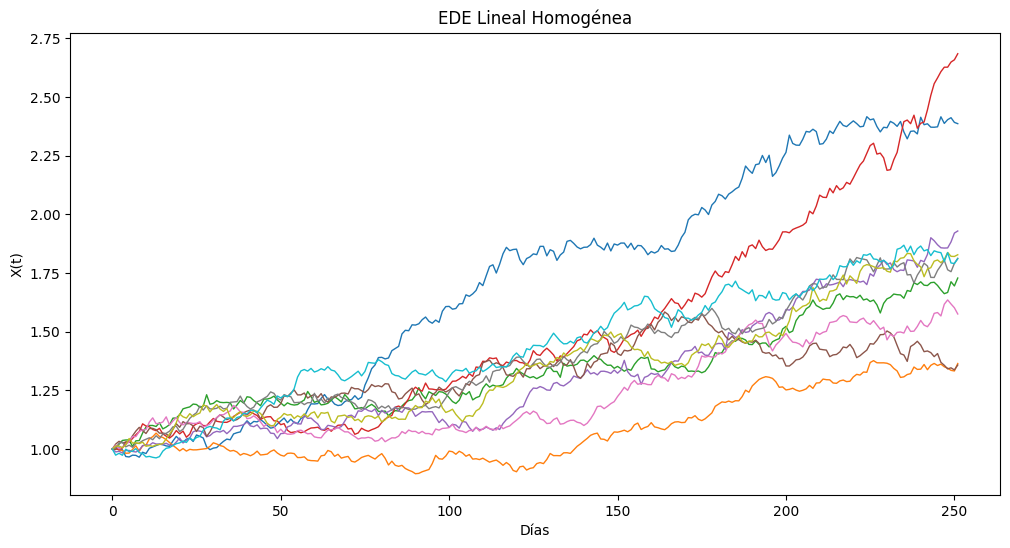

In [1]:
#Modelado del GBM
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm.notebook import tqdm

# Función para simular incrementos Brownianos
def simular_browniano_estandar(T, N, num_trayectorias):
    dt = T / N  # Paso de tiempo
    dB = np.sqrt(dt) * np.random.randn(N, num_trayectorias)  # Incrementos Brownianos para cada trayectoria y paso de tiempo
    return dB

# Parámetros generales
num_trayectorias = 12000  # Número de trayectorias
num_observaciones = 252  # Número de observaciones (días de trading en un año)
X0 = 1  # Condición inicial
T = 1  # Tiempo total
dt = T / num_observaciones  # Paso temporal

mu = 0.5  # Parámetro de mu
sigma = 0.2  # Parámetro de sigma
# Inicialización de la matriz de trayectorias para el escenario actual
trayectorias_Homogenea = np.zeros((num_observaciones, num_trayectorias))
trayectorias_Homogenea[0] = X0

# Generación de todos los incrementos Brownianos de todas las trayectorias a la vez
dB = simular_browniano_estandar(T, num_observaciones - 1, num_trayectorias)

# Generación de trayectorias usando los incrementos Brownianos pre-generados
for t in range(1, num_observaciones):
        trayectorias_Homogenea[t] = trayectorias_Homogenea[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dB[t - 1])


plt.figure(figsize=(12, 6))
for i in range(10):  # Graficar solo 10 trayectorias
    plt.plot(trayectorias_Homogenea[:, i], lw=1)
plt.xlabel("Días")
plt.ylabel("X(t)")
plt.title("EDE Lineal Homogénea")
plt.show()




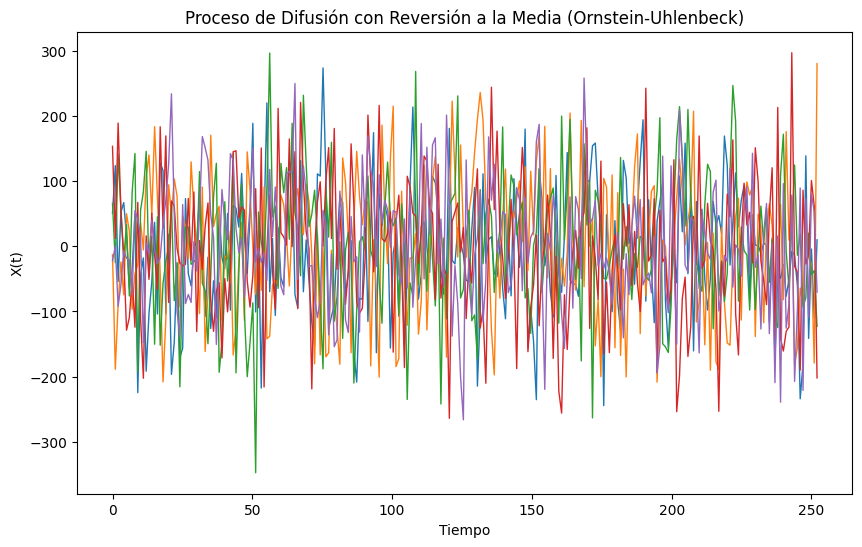

In [8]:
#Modelado del proceso con reversión a la media
# Parámetros del proceso
theta = 0.9   # fuerza de reversión
mu = 1.0       # valor medio
sigma = 100    # volatilidad
T = 252         # tiempo total de simulación
dt = 1      # tamaño del paso de tiempo
n_steps = int(T / dt)
n_simulations = 12000  # número de trayectorias a simular

# Inicialización de tiempo y matriz de simulación
np.random.seed(42)
time = np.linspace(0, T, n_steps)
trayectorias_reversion = np.zeros((n_steps, n_simulations))
trayectorias_reversion[0] = np.random.normal(mu, sigma, n_simulations)  # condiciones iniciales

# Generación de los incrementos Brownianos de todas las trayectorias
dW = simular_browniano_estandar(T, n_steps - 1, n_simulations)

# Simulación del proceso
for t in range(1, n_steps):
    trayectorias_reversion[t] = trayectorias_reversion[t - 1] + theta * (mu - trayectorias_reversion[t - 1]) * dt + sigma * dW[t - 1]

# Graficar las trayectorias simuladas
plt.figure(figsize=(10, 6))
for i in range(5):  # Graficar solo 10 trayectorias para mejor visualización
    plt.plot(time, trayectorias_reversion[:, i], lw=1)
plt.title("Proceso de Difusión con Reversión a la Media (Ornstein-Uhlenbeck)")
plt.xlabel("Tiempo")
plt.ylabel("X(t)")
plt.show()

In [9]:
#Implementación de la red WaveNet para las EDEs
trayectorias_EDEs = [trayectorias_Homogenea, trayectorias_reversion]
for trayectorias_de_prueba in trayectorias_EDEs:
    # Definición del Dataset
    class EDELinealDataset(Dataset):
        def __init__(self, trayectorias, seq_length=222, target_length=30, train=True):
            self.trayectorias = trayectorias
            self.seq_length = seq_length
            self.target_length = target_length
            self.train = train
            self.total_samples = 10000 if train else 2000  # 10000 para entrenamiento, 2000 para validación

            # Separar las trayectorias para entrenamiento y validación
            if train:
                self.data = trayectorias[:, :10000]  # Primeras 10,000 trayectorias para entrenamiento
            else:
                self.data = trayectorias[:, -2000:]  # Últimas 2,000 trayectorias para validación

        def __len__(self):
            return self.total_samples

        def __getitem__(self, idx):
            # Tomar los primeros 222 valores como `x` y los siguientes 30 valores como `y`
            x = torch.FloatTensor(self.data[:, idx][:self.seq_length])  # (256, 222)
            y = torch.FloatTensor(self.data[:, idx][self.seq_length:])  # (256, 30)

            # Agregar una dimensión de canal para `x`
            x = x.unsqueeze(0)  # Ahora `x` es de tamaño (1, 256, 222)
            return x, y

    # Crear Dataset y DataLoader para Entrenamiento y Validación
    seq_length = 222
    target_length = 30
    train_dataset = EDELinealDataset(trayectorias_de_prueba, seq_length, target_length, train=True)
    val_dataset = EDELinealDataset(trayectorias_de_prueba, seq_length, target_length, train=False)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    class EarlyStopping:
        def __init__(self, patience=100, verbose=False, delta=0, model_path="checkpoint.pt"):
            self.patience = patience
            self.verbose = verbose
            self.counter = 0
            self.best_score = None
            self.early_stop = False
            self.val_loss_min = float('inf')
            self.delta = delta
            self.model_path = model_path

        def __call__(self, val_loss, model):
            score = -val_loss
            if self.best_score is None:
                self.best_score = score
                self.save_checkpoint(val_loss, model)
            elif score < self.best_score + self.delta:
                self.counter += 1
                if self.verbose:
                    print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
                if self.counter >= self.patience:
                    self.early_stop = True
            else:
                self.best_score = score
                self.save_checkpoint(val_loss, model)
                self.counter = 0

        def save_checkpoint(self, val_loss, model):
            '''Saves model when validation loss decrease.'''
            if self.verbose:
                print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.model_path)
            self.val_loss_min = val_loss

    def train(model, train_loader, val_loader, criterion, optimizer, device, patience=100, epochs=100000, verbose=True, model_path="checkpoint.pt"):
        # Entrenar el modelo
        early_stopping = EarlyStopping(patience=patience, verbose=verbose, model_path=model_path)

        training_losses, validation_losses = [], []
        for epoch in tqdm(range(epochs)):
            model.train()
            train_losses = []
            for x_batch, y_batch in train_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                y_pred = model(x_batch)
                loss = criterion(y_pred, y_batch.unsqueeze(1))
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())

            val_losses = []
            model.eval()
            with torch.no_grad():
                for x_val, y_val in val_loader:
                    x_val, y_val = x_val.to(device), y_val.to(device)
                    y_val_pred = model(x_val)
                    val_loss = criterion(y_val_pred, y_val.unsqueeze(1))
                    val_losses.append(val_loss.item())

            train_loss = np.mean(train_losses)
            val_loss = np.mean(val_losses)

            training_losses.append(train_loss)
            validation_losses.append(val_loss)

            print(f'Epoch {epoch+1}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

            early_stopping(val_loss, model)

            if early_stopping.early_stop:
                print("Early stopping")
                break

        return training_losses, validation_losses


    # Arquitectura WaveNet simplificada para predicciones continuas con padding ajustado
    # Definición del modelo con dilataciones exponenciales
    class GatedCausalConv1d(nn.Module):
        def __init__(self, in_channels, out_channels, kernel_size, dilation=1):
            super(GatedCausalConv1d, self).__init__()
            self.padding = (kernel_size - 1) * dilation  # Padding causal

            # Convolución para la función de activación tanh
            self.conv_filter = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation)

            # Convolución para la función de activación sigmoid (gate)
            self.conv_gate = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation)

        def forward(self, x):
            # Aplicar convolución y recortar padding
            filter_out = self.conv_filter(x)
            gate_out = self.conv_gate(x)

            # Recortar el padding causal
            if self.padding > 0:
                filter_out = filter_out[:, :, :-self.padding]
                gate_out = gate_out[:, :, :-self.padding]

            # Aplicar la activación gated: tanh * sigmoid
            output = torch.tanh(filter_out) * torch.sigmoid(gate_out)
            return output

    class CausalConvolutionalNetwork(nn.Module):
        def __init__(self, in_channels=1, hidden_channels=16, out_channels=1, kernel_size=2, num_layers=5, target_length=30):
            super(CausalConvolutionalNetwork, self).__init__()
            self.target_length = target_length  # Longitud objetivo de la salida

            self.layers = nn.ModuleList()
            # Primera capa causal
            self.layers.append(GatedCausalConv1d(in_channels, hidden_channels, kernel_size, dilation=1))

            # Capas ocultas con dilatación exponencial
            for i in range(1, num_layers):
                self.layers.append(GatedCausalConv1d(hidden_channels, hidden_channels, kernel_size, dilation=2**i))

            # Capa de salida
            self.output_layer = nn.Conv1d(hidden_channels, out_channels, kernel_size=1)

        def forward(self, x):
            for layer in self.layers:
                x = layer(x)
            output = self.output_layer(x)

            # Extraer solo las últimas target_length posiciones de la salida
            output = output[:, :, -self.target_length:]
            return output

    # Parámetros del modelo y entrenamiento
    model = CausalConvolutionalNetwork(in_channels=1, hidden_channels=16, out_channels=1, kernel_size=2, num_layers=4, target_length=30)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Definición de criterio de pérdida y optimizador
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Definir el nombre del archivo basado en el nombre del conjunto de trayectorias
    model_path = "trayectorias_homogeneas.pt" if trayectorias_de_prueba is trayectorias_Homogenea else "trayectorias_reversion.pt"

    # Entrenamiento del modelo con parada temprana
    train_losses, val_losses = train(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        criterion=criterion,
        optimizer=optimizer,
        device=device,
        patience=100,
        epochs=1000,
        verbose=True,
        model_path=model_path
    )

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1, Train Loss: 0.296443, Val Loss: 0.017522
Validation loss decreased (inf --> 0.017522).  Saving model ...
Epoch 2, Train Loss: 0.016549, Val Loss: 0.016775
Validation loss decreased (0.017522 --> 0.016775).  Saving model ...
Epoch 3, Train Loss: 0.015646, Val Loss: 0.015157
Validation loss decreased (0.016775 --> 0.015157).  Saving model ...
Epoch 4, Train Loss: 0.015215, Val Loss: 0.014721
Validation loss decreased (0.015157 --> 0.014721).  Saving model ...
Epoch 5, Train Loss: 0.015159, Val Loss: 0.014711
Validation loss decreased (0.014721 --> 0.014711).  Saving model ...
Epoch 6, Train Loss: 0.014919, Val Loss: 0.016645
EarlyStopping counter: 1 out of 100
Epoch 7, Train Loss: 0.014603, Val Loss: 0.014276
Validation loss decreased (0.014711 --> 0.014276).  Saving model ...
Epoch 8, Train Loss: 0.014310, Val Loss: 0.014080
Validation loss decreased (0.014276 --> 0.014080).  Saving model ...
Epoch 9, Train Loss: 0.014413, Val Loss: 0.013738
Validation loss decreased (0.014080 

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1, Train Loss: 10139.311336, Val Loss: 10019.699482
Validation loss decreased (inf --> 10019.699482).  Saving model ...
Epoch 2, Train Loss: 10140.194841, Val Loss: 10019.306625
Validation loss decreased (10019.699482 --> 10019.306625).  Saving model ...
Epoch 3, Train Loss: 10138.114174, Val Loss: 10019.796999
EarlyStopping counter: 1 out of 100
Epoch 4, Train Loss: 10140.894687, Val Loss: 10019.869187
EarlyStopping counter: 2 out of 100
Epoch 5, Train Loss: 10139.012786, Val Loss: 10020.395213
EarlyStopping counter: 3 out of 100
Epoch 6, Train Loss: 10138.665894, Val Loss: 10020.681362
EarlyStopping counter: 4 out of 100
Epoch 7, Train Loss: 10137.116635, Val Loss: 10021.012757
EarlyStopping counter: 5 out of 100
Epoch 8, Train Loss: 10137.938286, Val Loss: 10021.242839
EarlyStopping counter: 6 out of 100
Epoch 9, Train Loss: 10138.838730, Val Loss: 10021.588371
EarlyStopping counter: 7 out of 100
Epoch 10, Train Loss: 10137.111487, Val Loss: 10021.960720
EarlyStopping counter:

In [10]:
# Evaluación del ajuste del modelo wavenet con los procesos estocásticos
# Función para cargar un modelo y evaluarlo con sus trayectorias
def evaluar_modelo(model_class, model_path, trayectorias, titulo, color_real="blue", color_pred="red"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Inicializar el modelo y cargar los pesos
    model = model_class(in_channels=1, hidden_channels=16, out_channels=1, kernel_size=2, num_layers=4, target_length=30)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    # Evaluar las últimas 4 trayectorias
    for idx in range(-1, 0):  # Índices de las últimas 4 trayectorias
        trayectoria = trayectorias[:, idx]  # Extraer la trayectoria actual

        # Preparar los primeros 222 datos como entrada (`x`) y los siguientes 30 como objetivo (`y_real`)
        x = torch.FloatTensor(trayectoria[:222]).unsqueeze(0).unsqueeze(0).to(device)  # [1, 1, 222]
        y_real = trayectoria[222:222 + 30]  # Últimos 30 valores para comparación

        # Pasar `x` por el modelo para obtener la predicción
        with torch.no_grad():
            y_pred = model(x).squeeze().cpu().numpy()  # Predicción como numpy

        # Asegurar que la predicción tenga la misma longitud que `y_real` y comience después de `x`
        y_pred = y_pred[-30:]  # Últimos 30 valores de la predicción

        # Graficar la trayectoria real y la predicción
        plt.figure(figsize=(12, 6))
        plt.plot(range(100, len(trayectoria)), trayectoria[100:], label="Trayectoria Real", color=color_real)
        plt.plot(range(222, 222 + len(y_pred)), y_pred + (trayectoria[221] - y_pred[0]),
                 label="Predicción de la AI", color=color_pred, linestyle="--")

        # Añadir etiquetas y leyenda
        plt.xlabel("Tiempos")
        plt.ylabel("Valor")
        plt.title(f"{titulo}")
        plt.legend()
        plt.show()

# Clases y rutas de modelos
model_class = CausalConvolutionalNetwork  # Clase del modelo WaveNet
path_reversion = "WaveNet_con_Reversion.pt"  # Ruta del modelo para trayectorias de reversión
path_homogeneas = "WaveNet_con_homogeneas.pt"  # Ruta del modelo para trayectorias homogéneas

# Evaluar WaveNet con reversión
evaluar_modelo(model_class, path_reversion, trayectorias_reversion, "WaveNet con Reversión")

# Evaluar WaveNet con homogéneas
evaluar_modelo(model_class, path_homogeneas, trayectorias_Homogenea, "WaveNet con GBM")



<ipython-input-10-9cbd2b7ee19a>:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


FileNotFoundError: [Errno 2] No such file or directory: 'WaveNet_con_Reversion.pt'

In [ ]:
from sklearn.metrics import mean_squared_error

def evaluar_modelo_con_mse(model_class, model_path, trayectorias, titulo):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Inicializar el modelo y cargar los pesos
    model = model_class(in_channels=1, hidden_channels=16, out_channels=1, kernel_size=2, num_layers=4, target_length=30)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    mse_total = 0
    n_trayectorias = trayectorias.shape[1]
    
    # Evaluar las trayectorias
    for idx in range(n_trayectorias):
        trayectoria = trayectorias[:, idx]  # Extraer la trayectoria actual
        
        # Preparar los primeros 222 datos como entrada (`x`) y los siguientes 30 como objetivo (`y_real`)
        x = torch.FloatTensor(trayectoria[:222]).unsqueeze(0).unsqueeze(0).to(device)  # [1, 1, 222]
        y_real = trayectoria[222:222 + 30]  # Últimos 30 valores para comparación
        
        # Pasar `x` por el modelo para obtener la predicción
        with torch.no_grad():
            y_pred = model(x).squeeze().cpu().numpy()  # Predicción como numpy
        
        # Ajustar la predicción y calcular el MSE
        y_pred = y_pred[-30:]  # Últimos 30 valores de la predicción
        y_pred += (trayectoria[221] - y_pred[0])  # Ajustar el desplazamiento
        mse = mean_squared_error(y_real, y_pred)
        mse_total += mse
    
    # Calcular el MSE promedio
    mse_promedio = mse_total / n_trayectorias
    print(f"{titulo} - MSE Promedio: {mse_promedio:.4f}")
    return mse_promedio

# Evaluar WaveNet con reversión
mse_reversion = evaluar_modelo_con_mse(
    model_class, path_reversion, trayectorias_reversion, "WaveNet con Reversión"
)

# Evaluar WaveNet con homogéneas
mse_homogeneas = evaluar_modelo_con_mse(
    model_class, path_homogeneas, trayectorias_Homogenea, "WaveNet con GBM"
)

